In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import sklearn.tree
from matplotlib import pyplot as plt

In [30]:
def compute_error(y_pred, y, w):
    return sum(w*np.not_equal(y_pred, y).astype(int))/sum(w)

def compute_alpha(error):
    return np.log((1-error)/error)

def update_weight(w, alpha, y_pred, y):
    w = w*np.exp(alpha*np.not_equal(y_pred, y).astype(int))
    return w

def predict(trees, alphas, X):
    return np.sign(sum([alphas[m]*trees[m].predict(X) for m in range(len(trees))]))

def adaboost(X_train, Y_train, num_classifier):
    trees, w_errors, alphas, training_errors = [[] for j in range(4)]
    num_sample, num_feature = [len(X_train), len(X_train[0])]
    for i in range(num_classifier):
        if i == 0: w = np.ones(len(Y_train))/len(Y_train)
        else: w = update_weight(w, alpha, y_pred, Y_train)
           
        tree_m = sklearn.tree.DecisionTreeClassifier(max_depth=1)
        tree_m.fit(X_train, Y_train, sample_weight = w)
        trees.append(tree_m)
        
        y_pred = tree_m.predict(X_train)
        w_error = compute_error(y_pred, Y_train, w)
        alpha = compute_alpha(w_error)
        
        w_errors.append(w_error)
        alphas.append(alpha)
        
        Y_pred_train = predict(trees, alphas, X_train)
        training_error = sum(np.not_equal(Y_pred_train, Y_train).astype(int))/len(Y_train)
        training_errors.append(training_error)
    return trees, w_errors, alphas, training_errors

In [23]:
df = pd.read_csv('./spambase/spambase.data', header = None)
names = pd.read_csv('./spambase/spambase.names', sep = ':', skiprows=range(33), header = None)
col_names = list(names[0])
col_names.append('Spam')
df.columns = col_names
df['Spam'] = df['Spam'] * 2 - 1

In [24]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df.drop(columns = 'Spam').values, df['Spam'].values, train_size = 3065, random_state = 2) 

In [31]:
trees, w_errors, alphas, training_errors = adaboost(X_train, y_train, 400)

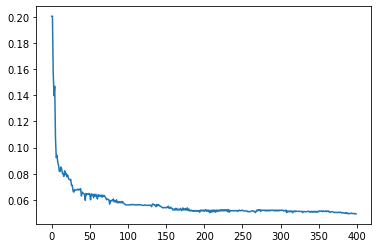

In [33]:
plt.plot(range(400), training_errors)
plt.show()

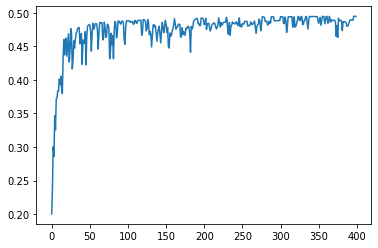

In [63]:
plt.plot(range(400), errors)
plt.show()

In [70]:
Y_pred_models = predict(trees, alphas, X_test)
print(Y_pred_models)
print(y_test)

[ 1.  1.  1. ... -1. -1.  1.]
[ 1  1  1 ... -1 -1 -1]
